## Midterm BME 502 2025

In this midterm exam, you are tasked to develop a method to tell whether data is better described by a line fit or a sigmoidal fit.

In [2]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-502-2025-homeworks`


In [3]:
Pkg.add(["Plots","Distributions","Random","Statistics","NonlinearSolve","LsqFit"])

    Updating registry at `~/.julia/registries/NeurobloxRegistry`
    Updating git-repo `https://github.com/Neuroblox/NeurobloxRegistry`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-502-2025-homeworks/Project.toml`
  No Changes to `~/Documents/programming/BME-502-2025-homeworks/Manifest.toml`


In [4]:
Pkg.status()

Status `~/Documents/programming/BME-502-2025-homeworks/Project.toml`
⌃ [31c24e10] Distributions v0.25.118
⌅ [f6369f11] ForwardDiff v0.10.38
⌃ [2fda8390] LsqFit v0.15.0
⌃ [8913a72c] NonlinearSolve v4.4.0
⌃ [91a5bcdd] Plots v1.40.10
  [10745b16] Statistics v1.11.1
  [9a3f8284] Random v1.11.0
Info Packages marked with ⌃ and ⌅ have new versions available. Those with ⌃ may be upgradable, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [5]:
using Plots, Distributions, Random, Statistics, NonlinearSolve, ForwardDiff, LinearAlgebra, LsqFit

In [6]:
line_fit(x,p) = p[1] .+ p[2] .* x

line_fit (generic function with 1 method)

In [7]:
sigmoid_fit(x,p) = p[1] .+ p[2] ./ (1 .+ exp.(-p[3]*(x .- p[4])))

sigmoid_fit (generic function with 1 method)

Let's create some plots to see how these functions look

In [8]:
x = 0:0.1:10

0.0:0.1:10.0

In [9]:
y_line = line_fit(x,[2,0.5])

2.0:0.05:7.0

In [10]:
y_sigmoid = sigmoid_fit(x,[2.5,3.5,0.1,5.5])

101-element Vector{Float64}:
 3.7805254314621974
 3.788656537923644
 3.796809108114118
 3.8049828179038157
 3.8131773393604975
 3.8213923407935093
 3.8296274867991844
 3.837882438307629
 3.8461568526308625
 3.854450383512326
 3.862762681177723
 3.8710933923871993
 3.879442160488838
 ⋮
 4.5446668302739255
 4.553161526210655
 4.5616415192053275
 4.57010642451473
 4.5785558602695
 4.586989447538757
 4.595406810393582
 4.603807575969294
 4.612191374526542
 4.620557839511163
 4.6289066076128
 4.637237318822277

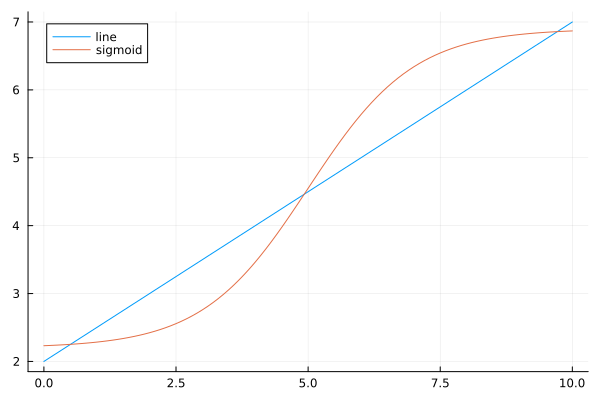

In [11]:
y_line = line_fit(x,[2,0.5])
y_sigmoid = sigmoid_fit(x,[2.2,4.7,1,5.0])
plot(x, y_line, label = "line")
plot!(x, y_sigmoid, label = "sigmoid")

Let us add some serious noise to it

In [12]:
nd = Normal(0,0.5)
x_line = 10*rand(200)
y_line_n = line_fit(x_line,[2,0.5]) .+ rand(nd,length(x_line))
x_sigmoid = 10*rand(200)
y_sigmoid_n = sigmoid_fit(x_sigmoid,[2.2,4.7,1,5.0]) .+ rand(nd,length(x_sigmoid))

200-element Vector{Float64}:
 6.567932535509087
 6.281246571814298
 4.10529666848064
 1.8087432037973759
 5.965909563876755
 4.50028258134176
 1.7792858799612574
 3.8918022228983196
 5.033966603709308
 5.722158110542631
 6.95166888065756
 5.278948669446274
 3.873175692543869
 ⋮
 6.5059941872960385
 5.108752425801952
 2.369894902366625
 3.12050854350293
 1.8972125700989773
 6.5484964645131525
 5.897233877985852
 3.2539824261084576
 2.2749198137223243
 3.9661146513668286
 7.285996596666319
 6.6567320545876445

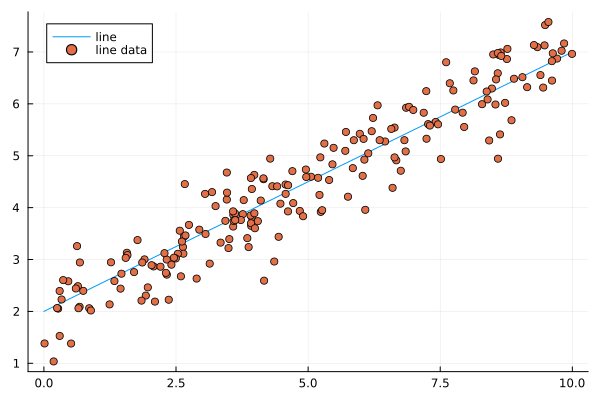

In [13]:
plot(x, y_line, label = "line")
scatter!(x_line, y_line_n, label = "line data")

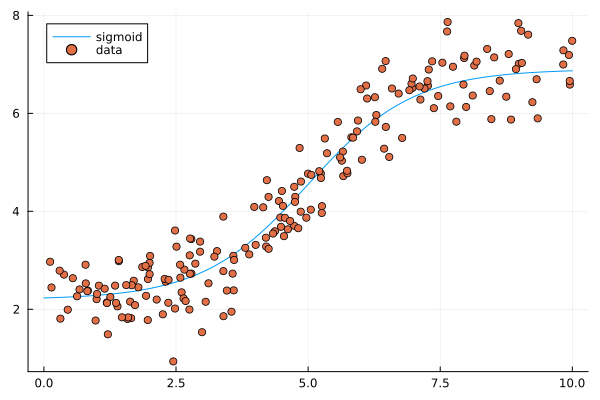

In [14]:
plot(x, y_sigmoid, label = "sigmoid")
scatter!(x_sigmoid, y_sigmoid_n, label = "data")

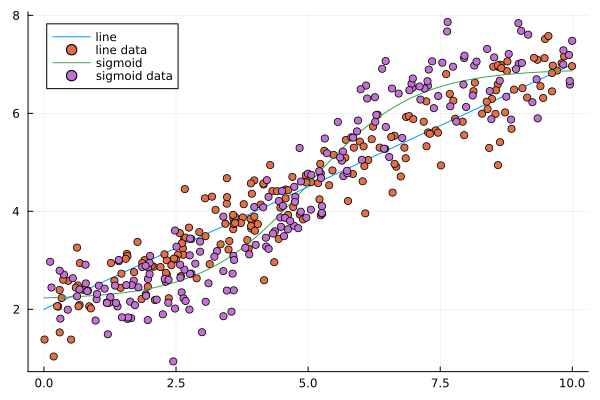

In [15]:
# let's plot it all together
plot(x, y_line, label = "line")
scatter!(x_line, y_line_n, label = "line data")
plot!(x, y_sigmoid, label = "sigmoid")
scatter!(x_sigmoid, y_sigmoid_n, label = "sigmoid data")

# Question:

If you take the sigmoid data, which fit is better? The linear or sigmoid?

How uncertain are the parameters?

At what noise level are the two fits equally likely?

In [16]:
function lsqfitting(fitfct, (x,y) , β0; sigma=[], return_sigma = false)
    # check whether sigma is an empty list
    if length(sigma)==0
        # don't know sigma
        fit = curve_fit(fitfct, x, y, β0)
        lq(β) = sum(abs2, (fitfct(x,β) .- y))
        sigma = sqrt(lq(fit.param)/(length(x)-length(β0)))
        chi2nos(β) = sum(abs2, (fitfct(x,β) .- y) ./ sigma)
        if return_sigma
            return fit.param, inv(2*ForwardDiff.hessian(chi2nos,fit.param)), chi2nos(fit.param), sigma
        else
            return fit.param, inv(2*ForwardDiff.hessian(chi2nos,fit.param)), chi2nos(fit.param)
        end
    else
        # know sigma
        if length(sigma)==1
            fit = curve_fit(fitfct, x, y, β0)
        else
            fit = curve_fit(fitfct, x, y, 1 ./ sigma, β0)
        end
        chi2(β) = sum(abs2, (fitfct(x,β) .- y) ./ sigma)
        if return_sigma
            return fit.param, inv(2*ForwardDiff.hessian(chi2,fit.param)), chi2(fit.param), sigma
        else
            return fit.param, inv(2*ForwardDiff.hessian(chi2,fit.param)), chi2(fit.param)
        end
    end
end

lsqfitting (generic function with 1 method)

# Part 1 (20 points)
Create a function line_fitting(x,y; sigma=[]) that returns the best parameters and the covariance matrix.  The standard deviation of the measurement error, sigma, can be supplied as a number (assuming that all measurements share the same error) or as a vector with the same length as y. If sigma (standard deviation of measurement error) is not specified (sigma=[]), estimate the measurement error using the sum of least squares to estimate $\mathcal{X}^2$.

In [23]:
line_fit(x,p) = p[1] .+ p[2] .* x
line_fitting(x, y, β0; sigma=[], return_sigma=false) = lsqfitting(line_fit, (x,y) , β0; sigma=sigma, return_sigma=return_sigma)

line_fitting (generic function with 1 method)

In [24]:
line_param, line_cov, line_chi2min = line_fitting(x_line, y_line_n, [1.5,1], sigma = 0.5)

([1.8641415883665218, 0.5242249677500628], [0.0012809656041732744 -0.000198967863799273; -0.00019896786379927303 4.087725021338299e-5], 177.34526668505612)

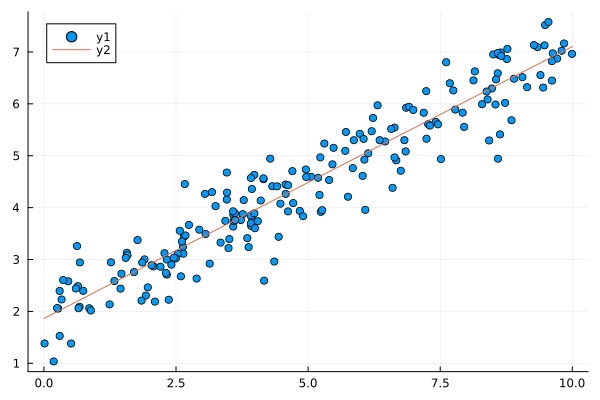

In [25]:
scatter(x_line, y_line_n)
plot!(x,line_fit(x,line_param))

In [26]:
line_param2, line_cov2, line_chi2min2, sig = line_fitting(x_line, y_line_n, [1.5,1], sigma = [], return_sigma=true)

([1.8641415883665218, 0.5242249677500628], [0.0011473393266994763 -0.00017821216599615377; -0.00017821216599615375 3.661306485072849e-5], 198.0, 0.47320269575416646)

In [27]:
line_param2, line_cov2, line_chi2min2 = line_fitting(x_line, y_line_n, [1.5,1], sigma = ones(length(x_line)) .* 0.5)

([1.8641415883658503, 0.5242249677501558], [0.0012809656041732744 -0.000198967863799273; -0.00019896786379927303 4.087725021338299e-5], 177.3452666850561)

# Part 2 (20 points)
Similarily, create a function sigmoid_fitting(x,y; sigma=[]) that returns the best parameters and the covariance matrix. Treat sigma the same way as in Part 1.

In [28]:
sigmoid_fit(x,p) = p[1] .+ p[2] ./ (1 .+ exp.(-p[3]*(x .- p[4])))
sigmoid_fitting(x, y, β0; sigma=[], return_sigma=false) = lsqfitting(sigmoid_fit, (x,y) , β0; sigma=sigma, return_sigma=return_sigma)

sigmoid_fitting (generic function with 1 method)

In [29]:
sig_param, sig_cov, sig_chi2min = sigmoid_fitting(x_sigmoid, y_sigmoid_n, [2.0,4.3,1.2,4.5], sigma = 0.5)

([2.301159867122807, 4.663786645212845, 1.1180976147095143, 5.125725071546722], [0.001664516346695267 -0.002280818130160751 0.0012533216084415384 0.000579730207052903; -0.0022808181301607515 0.005470686067705867 -0.0027943294813345394 0.0004928324866404277; 0.0012533216084415386 -0.0027943294813345394 0.0023507805764570243 -0.00020881040382425672; 0.000579730207052903 0.0004928324866404276 -0.00020881040382425675 0.0016001813769660465], 201.025856220345)

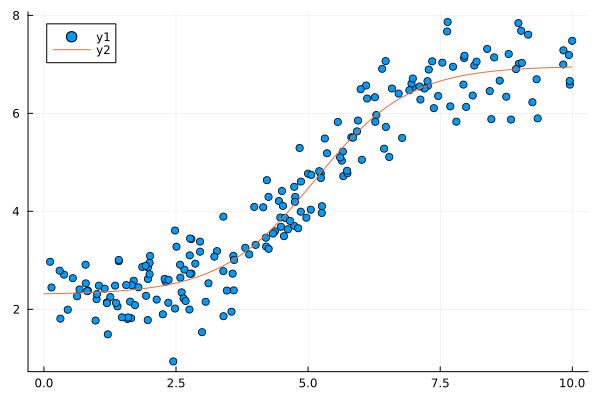

In [30]:
scatter(x_sigmoid, y_sigmoid_n)
plot!(x,sigmoid_fit(x,sig_param))

In [32]:
sig_param, sig_cov, sig_chi2min, sig_sig = sigmoid_fitting(x_sigmoid, y_sigmoid_n, [2.0,4.3,1.2,4.5], sigma = [], return_sigma=true)

([2.301159867122807, 4.663786645212845, 1.1180976147095143, 5.125725071546722], [0.0017071980805467978 -0.0023393031505022756 0.0012854594360021284 0.0005945957206612539; -0.002339303150502276 0.005610966075884071 -0.002865982023199105 0.0005054697581637563; 0.001285459436002129 -0.0028659820231991054 0.002411059582491976 -0.0002141647460024928; 0.0005945957206612537 0.000505469758163757 -0.00021416474600249313 0.001641213425573722], 195.99999999999994, 0.5063699545720473)

In [33]:
sig_param, sig_cov, sig_chi2min = sigmoid_fitting(x_sigmoid, y_sigmoid_n, [2.0,4.3,1.2,4.5], sigma = ones(length(x_line)) .* 0.5)

([2.301159867126634, 4.663786645206526, 1.1180976147160702, 5.125725071548209], [0.0016645163466826774 -0.0022808181301441056 0.0012533216084461341 0.000579730207045661; -0.002280818130144106 0.005470686067677599 -0.0027943294813533143 0.0004928324866438177; 0.0012533216084461346 -0.0027943294813533143 0.00235078057650363 -0.00020881040383131577; 0.0005797302070456605 0.0004928324866438187 -0.00020881040383131623 0.0016001813769561223], 201.025856220345)

# Part 3 (30 points)
Create a function p_ratio_sig_line(x,y; sigma=[]) that returns the Posterior ratio between a fit to a sigmoid and to a line.  Treat sigma the same way as in Part 1-2.

In [44]:
function p_ratio_sig_line(x,y,β0,λ0,β_prodprior,λ_prodprior;sigma=[])
    line_param, line_cov, line_chi2min = line_fitting(x, y, β0, sigma = sigma)
    sig_param, sig_cov, sig_chi2min = sigmoid_fitting(x, y, λ0, sigma = sigma)
    pr1 = exp((line_chi2min-sig_chi2min)/2)
    pr2 = sqrt(det(sig_cov)*(2*π)^length(λ0))/sqrt(det(line_cov)*(2*π)^length(β0))
    pr3 = β_prodprior/λ_prodprior
    return pr1*pr2*pr3
end

p_ratio_sig_line (generic function with 1 method)

In [35]:
p_ratio_sig_line(x_sigmoid,y_sigmoid_n,[1.5,1],[2.0,4.3,1.2,4.5],1.0,10.0;sigma=0.5)

3.828950784753891e33

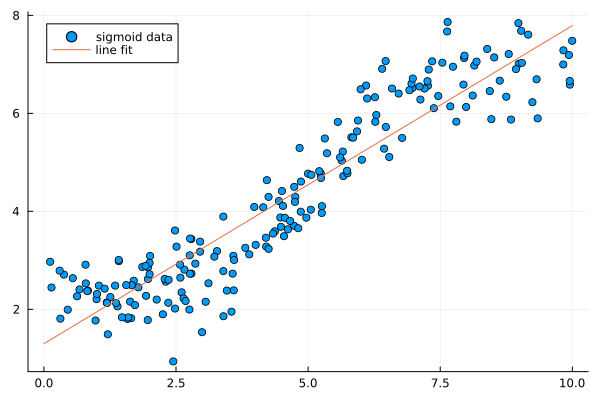

In [37]:
line_param_sig, line_cov_sig, line_chi2min_sig = line_fitting(x_sigmoid, y_sigmoid_n, [1.5,1], sigma = 0.5)
scatter(x_sigmoid,y_sigmoid_n,label="sigmoid data")
plot!(x,line_fit(x,line_param_sig),label="line fit")

In [38]:
p_ratio_sig_line(x_line,y_line_n,[1.5,1],[2.0,4.3,1.2,4.5],1.0,10.0;sigma=0.5)

176.36075969430516

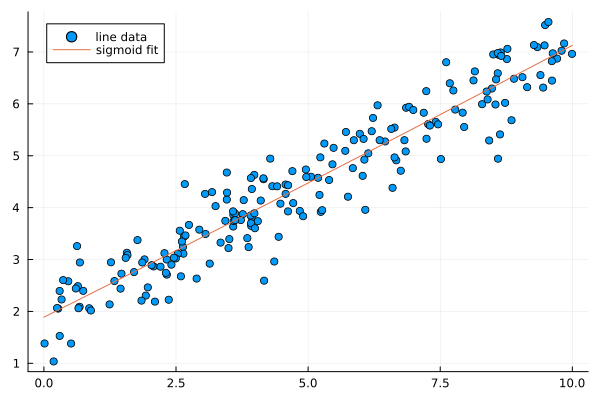

In [39]:
sig_param_line, sig_cov_line, sig_chi2min_line = sigmoid_fitting(x_line, y_line_n, [2.0,4.3,1.2,4.5], sigma = 0.5)
scatter(x_line,y_line_n,label="line data")
plot!(x,sigmoid_fit(x,sig_param_line),label="sigmoid fit")

# Part 4 (30 points)
Create a function sig_p_ratio_is_one(x,y; sigma=[]) that returns the measurement error (either as a number or array depending on how the sigma is supplied) that would result in a posterior ratio between sigmoid and line of one. If sigma is not provided (sigma=[]), proceed as in Part 1-3.

In [99]:
function sig_p_ratio_is_one(x,y,β0,λ0,β_prodprior,λ_prodprior;sigma=[])
    line_param, line_cov, line_chi2min,line_sig = line_fitting(x, y, β0, sigma = sigma, return_sigma=true)
    sig_param, sig_cov, sig_chi2min,sig_sig = sigmoid_fitting(x, y, λ0, sigma = sigma, return_sigma=true)
    pr1 = exp((line_chi2min-sig_chi2min)/2)
    pr2 = sqrt(det(sig_cov)*(2*π)^length(λ0))/sqrt(det(line_cov)*(2*π)^length(β0))
    pr3 = β_prodprior/λ_prodprior
    gamma2 = -log(pr2*pr3)*2/(line_chi2min-sig_chi2min)
    if line_sig==sig_sig
        sig_avg = line_sig
    else
        sig_avg = (line_sig .+ sig_sig)./2
    end
    if gamma2<0
        println("Warning: there is no sigma that results in PR=1")
        return nothing
    else
        return sig_avg/sqrt(gamma2)
    end
end

sig_p_ratio_is_one (generic function with 1 method)

In [43]:
function p_ratio_sig_line2(x,y,β0,λ0,β_prodprior,λ_prodprior;sigma=[])
    line_param, line_cov, line_chi2min = line_fitting(x, y, β0, sigma = sigma)
    sig_param, sig_cov, sig_chi2min = sigmoid_fitting(x, y, λ0, sigma = sigma)
    pr1 = exp((line_chi2min-sig_chi2min)/2)
    pr2 = sqrt(det(sig_cov)*(2*π)^length(λ0))/sqrt(det(line_cov)*(2*π)^length(β0))
    pr3 = β_prodprior/λ_prodprior
    return pr1,pr2,pr3
end

p_ratio_sig_line2 (generic function with 1 method)

In [45]:
p_ratio_sig_line2(x_line,y_line_n,[1.5,1],[2.0,4.3,1.2,4.5],1.0,10.0;sigma=0.5)

(1.0356342084789882, 1702.9252051583162, 0.1)

In [46]:
p_ratio_sig_line2(x_sigmoid,y_sigmoid_n,[1.5,1],[2.0,4.3,1.2,4.5],1.0,10.0;sigma=0.5)

(4.5477575169513056e35, 0.0841942599288081, 0.1)

In [94]:
p_ratio_sig_line(x_sigmoid,y_sigmoid_n,[1.5,1],[2.0,4.3,1.2,4.5],1.0,10.0;sigma=0.5)

3.828950784753891e33

In [100]:
sig_p_ratio_is_one(x_sigmoid,y_sigmoid_n,[1.5,1],[2.0,4.3,1.2,4.5],1.0,10.0;sigma=0.5)

2.072849511248007

In [101]:
p_ratio_sig_line(x_sigmoid,y_sigmoid_n,[1.5,1],[2.0,4.3,1.2,4.5],1.0,10.0;sigma=2.072849511248007)

17.186820385124328

In [93]:
p_ratio_sig_line2(x_sigmoid,y_sigmoid_n,[1.5,1],[2.0,4.3,1.2,4.5],1.0,10.0;sigma=0.5/0.24)

(113.21112980179717, 1.4617059015417992, 0.1)

In [83]:
sig_p_ratio_is_one(x_line,y_line_n,[1.5,1],[2.0,4.3,1.2,4.5],1.0,10.0;sigma=0.5)

## Programming Advice:
To make your program more efficient you should think about creating functions that provide information that you can use for all of the parts.  Don't write each function individually, but think what are the common task that need to be done, and then call these more general functions, to get you the result for the specific questions.  I will reward good programming style with a bonus 10 points total.